# ¿Alcanza el salario? Un análisis de la canasta básica en las MIPYMES de La Habana

Actualmente, el precio de la vida en Cuba se ha convertido en una de las mayores incógnitas para el ciudadano. Con la irrupción de las Micro, Pequeñas y Medianas Empresas (MIPYMES) en el escenario minorista, la oferta de alimentos se ha estabilizado en los estantes, pero a precios que desafían constantemente el bolsillo del trabajador estatal. Este proyecto nace de una pregunta sencilla pero necesaria: ¿Cuánto de nuestro salario se queda realmente en la tablilla de precios de una MIPYME?

El objetivo de este análisis es calcular el costo real de una "canasta mínima" de 7 productos esenciales (arroz, azúcar, sal, frijoles, espagueti, salsa de tomate y aceite) en dos de los municipios con mayor actividad comercial de la capital: Plaza de la Revolución y Playa. Lo que buscamos con esto es una fotografía práctica de la realidad.

Para ello, hemos recopilado datos de 53 establecimientos entre los 2 municipios. Es importante notar que la disponibilidad es irregular; por eso, en nuestra base de datos, los productos ausentes se marcan como valores nulos, permitiéndonos trabajar solo con la oferta real existente.

Como punto de comparación, utilizaremos el salario medio de La Habana (6,449 CUP) según el último reporte de la ONEI. Al cruzar estos datos, intentaremos responder: ¿Es el salario una herramienta suficiente para acceder a la alimentación básica o es simplemente un punto de partida insuficiente? A través de visualizaciones y cálculos de promedios, veremos qué municipio trata "mejor" al consumidor y qué porcentaje del ingreso mensual se desvanece antes de llegar a casa.

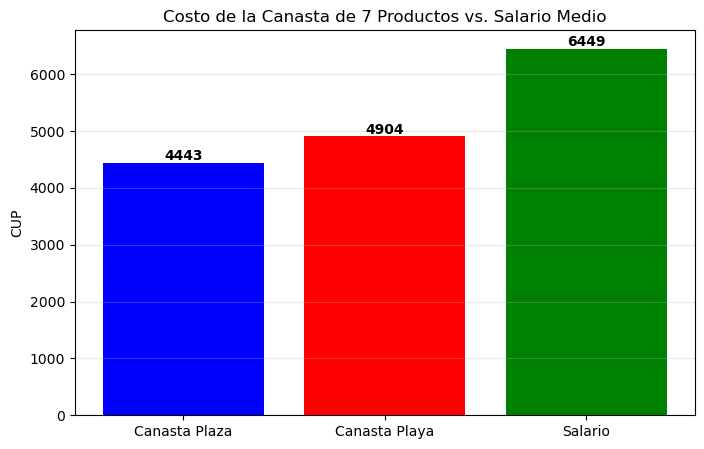

In [2]:
import src.icd_module as icd
import matplotlib.pyplot as plt

# Cargar la data de la ruta
datos = icd.cargar_datos("D:/Mis cosas/Proyecto/data/General.json")

# Lista de lo que voy a comprar
mis_productos = ["Arroz", "Azucar", "Sal", "Espagueti", "Salsa de tomate", "Aceite", "Frijoles"]

# Calculando costos y sacando el salario
c_plaza = icd.calcular_costo_canasta_basica(datos, 'plaza', mis_productos)
c_playa = icd.calcular_costo_canasta_basica(datos, 'playa', mis_productos)
sueldo = datos['salario_referencia']['valor']

# Datos para el gráfico
etiquetas = ['Canasta Plaza', 'Canasta Playa', 'Salario']
precios = [c_plaza, c_playa, sueldo]

plt.figure(figsize=(8, 5))
# poner los colores
plt.bar(etiquetas, precios, color=['blue', 'red', 'green'])

# Poner los valores arriba de las barras
for i in range(len(precios)):
    plt.text(i, precios[i] + 50, f'{int(precios[i])}', ha='center', weight='bold')

plt.title('Costo de la Canasta de 7 Productos vs. Salario Medio')
plt.ylabel('CUP')
plt.grid(axis='y', alpha=0.3)

plt.show()

   Como se aprecia en el gráfico anterior, la situación es crítica. El costo de una canasta de apenas 7 productos básicos en el municipio Playa (4,904.65 CUP) representa más del 76% del salario medio de un trabajador en La Habana. Incluso en Plaza, que resulta ligeramente más económico, el margen que queda para otros gastos esenciales como electricidad, transporte o aseo es mínimo. Esto confirma nuestra hipótesis inicial: el salario estatal ha perdido su función como garantía de consumo básico frente a los precios de las MIPYMES. También hay que tener en cuenta que solo analizamos el hecho de comprar una canasta básica en el mes, lo cual la verdad es bastante absurdo, porque solo incluiría una bolsa de arroz y un paquete de espagueti, lo cual no alcanzaría para alimentarse ni 3 días.

   Sin embargo, los promedios pueden ocultar realidades importantes. ¿Todos los establecimientos venden al mismo precio o hay mucha diferencia entre ellos? Para entender esto, analizaremos la dispersión de precios del arroz en ambos municipios. Este análisis nos permitirá ver si existe una competencia real que beneficie al consumidor o si los precios están estandarizados al alza

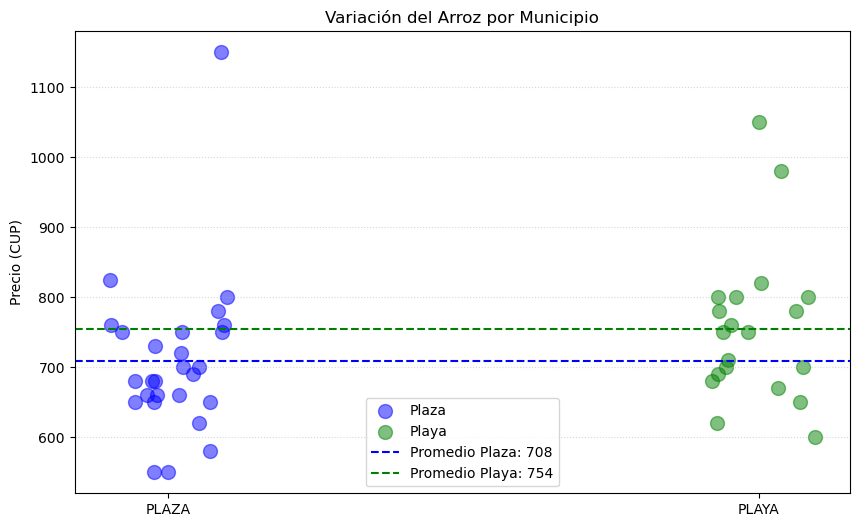

In [3]:
# Cargar los datos
m_plaza = icd.obtener_mipymes_por_municipio(datos, 'plaza')
m_playa = icd.obtener_mipymes_por_municipio(datos, 'playa')

precios_plaza = icd.obtener_precios_de_producto(m_plaza, 'Arroz')
precios_playa = icd.obtener_precios_de_producto(m_playa, 'Arroz')

# Calcular promedios
prom_plaza = icd.calcular_promedio(precios_plaza)
prom_playa = icd.calcular_promedio(precios_playa)

plt.figure(figsize=(10, 6))

import numpy as np
plt.scatter([1] * len(precios_plaza) + np.random.uniform(-0.1, 0.1, len(precios_plaza)),
            precios_plaza, color='blue', alpha=0.5, s=100, label='Plaza')

plt.scatter([2] * len(precios_playa) + np.random.uniform(-0.1, 0.1, len(precios_playa)),
            precios_playa, color='green', alpha=0.5, s=100, label='Playa')

# Líneas de promedio
plt.axhline(y=prom_plaza, color='blue', linestyle='--', label=f'Promedio Plaza: {int(prom_plaza)}')
plt.axhline(y=prom_playa, color='green', linestyle='--', label=f'Promedio Playa: {int(prom_playa)}')

# Detalles
plt.xticks([1, 2], ['PLAZA', 'PLAYA'])
plt.ylabel('Precio (CUP)')
plt.title('Variación del Arroz por Municipio')
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()

plt.show()

Este gráfico revela que el mercado de productos básicos en La Habana es altamente heterogéneo. Aunque el precio promedio del arroz es ligeramente superior en Playa (754 CUP) frente a Plaza (709 CUP), lo más preocupante es la enorme brecha de precios entre establecimientos: un mismo kilo de arroz puede costar desde 550 CUP hasta más de 1100 CUP en el mismo municipio. La presencia de valores atípicos tan elevados sugiere que el consumidor no solo enfrenta una inflación generalizada, sino también una falta de uniformidad que lo obliga a realizar una búsqueda constante para encontrar los precios más bajos y proteger su capacidad de compra

En Plaza: Los precios están más "apretados". La mayoría vende el arroz a un precio muy similar, lo que indica un mercado más estable o competitivo.

En Playa: Los puntos están más estirados verticalmente. Esto significa que si entras en la primera MIPYME que veas, tienes un alto riesgo de pagar mucho más que en la de la esquina siguiente.

Habiendo analizado la variabilidad de precios, ahora visualizamos la proporción del salario medio mensual que representa esta canasta básica de solo 7 productos. Este gráfico permite entender por qué el ahorro es prácticamente inexistente para un trabajador promedio.

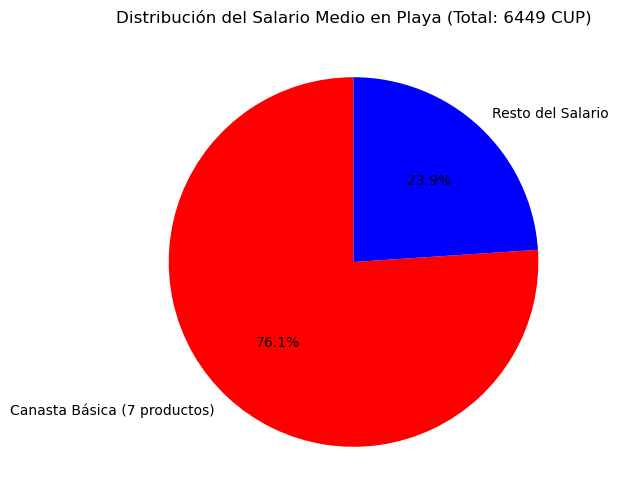

In [4]:
# Calculamos lo que se va en comida y lo que queda (Playa)
gasto_comida = icd.calcular_costo_canasta_basica(datos, 'playa', mis_productos)
sueldo = datos['salario_referencia']['valor']
lo_que_queda = sueldo - gasto_comida

# Datos
etiquetas = ['Canasta Básica (7 productos)', 'Resto del Salario']
valores = [gasto_comida, lo_que_queda]

plt.figure(figsize=(8, 6))

# poner el porcentaje en el gráfico con una sola decima
plt.pie(valores, labels=etiquetas,
        autopct=lambda p: f'{p:.1f}%',
        colors=['red', 'blue'], startangle=90)

plt.title(f'Distribución del Salario Medio en Playa (Total: {int(sueldo)} CUP)')

plt.show()

El resultado es contundente: el 76.1% del salario medio se esfuma al comprar apenas 7 productos básicos en el municipio Playa. Esto significa que a un trabajador solo le queda un 23.9% (aproximadamente 1,544 CUP) para pagar electricidad, agua, transporte, aseo personal y cualquier otra emergencia. Este gráfico ilustra la vulnerabilidad económica extrema, donde la alimentación no es un gasto más, sino el destino casi exclusivo del ingreso. Hay que tener en cuenta de que si incluyéramos los otros productos el salario no alcanzaría en absoluto, además no incluí ningún tipo de cárnico o verdura, que sería imprescindible para una alimentación saludable, pero no podemos permitírnoslo.

Para entender la composición de la inflación, desglosamos la canasta. En el siguiente gráfico se muestra el precio promedio de cada producto. Esto permite identificar qué artículos específicos son los responsables de que el costo total de la canasta se dispare.

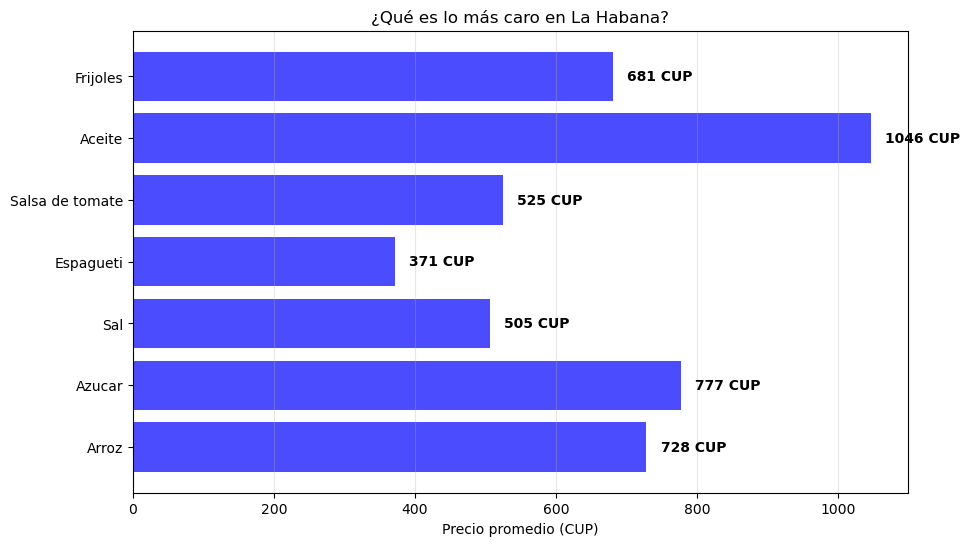

In [5]:
# Promedios (Plaza + Playa)
todas = icd.obtener_mipymes_por_municipio(datos, 'plaza') + icd.obtener_mipymes_por_municipio(datos, 'playa')
promedios = []

for p in mis_productos:
    lista = icd.obtener_precios_de_producto(todas, p)
    promedios.append(icd.calcular_promedio(lista))

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))

# Dandole color
plt.barh(mis_productos, promedios, color='blue', alpha=0.7)

# precio al final de la barra
for i in range(len(promedios)):
    plt.text(promedios[i] + 20, i, f'{int(promedios[i])} CUP', va='center', weight='bold')

plt.title('¿Qué es lo más caro en La Habana?')
plt.xlabel('Precio promedio (CUP)')
# lineas horizontales en los precios
plt.grid(axis='x', alpha=0.3)

plt.show()

Este ranking permite identificar los 'puntos de dolor' en el presupuesto familiar. Mientras que productos como el aceite dominan el gasto con un promedio de 1046 CUP, otros artículos tienen un impacto menor. Esta jerarquía de precios demuestra que la inflación no afecta por igual a todos los productos, y que el costo final de la canasta está fuertemente condicionado por apenas dos o tres productos críticos. Supongo que no podremos comprar más aceite si queremos comer más días.

El siguiente gráfico compara el precio más bajo y el más alto encontrados para cada producto. Esta visualización es vital para el consumidor, pues muestra que la diferencia entre comprar 'donde primero se vea' y buscar la mejor oferta puede significar un ahorro de cientos de pesos por cada artículo

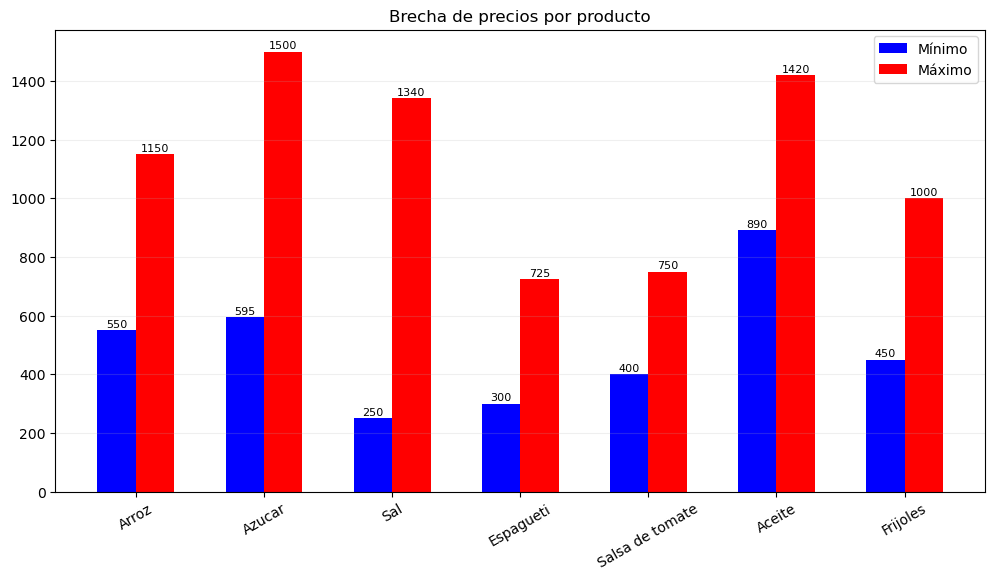

In [6]:
#  Datos (Sumamos las listas directamente)
todas = icd.obtener_mipymes_por_municipio(datos, 'plaza') + icd.obtener_mipymes_por_municipio(datos, 'playa')
minimos = [min(icd.obtener_precios_de_producto(todas, p)) for p in mis_productos]
maximos = [max(icd.obtener_precios_de_producto(todas, p)) for p in mis_productos]

#  Configuración
x = np.arange(len(mis_productos))
ancho = 0.3

plt.figure(figsize=(12, 6))
plt.bar(x - ancho/2, minimos, ancho, label='Mínimo', color='blue')
plt.bar(x + ancho/2, maximos, ancho, label='Máximo', color='red')

# precios en las barras
for i in range(len(mis_productos)):
    plt.text(i - ancho/2, minimos[i] + 10, int(minimos[i]), ha='center', fontsize=8)
    plt.text(i + ancho/2, maximos[i] + 10, int(maximos[i]), ha='center', fontsize=8)

plt.title('Brecha de precios por producto')
plt.xticks(x, mis_productos, rotation=30)
plt.legend()
plt.grid(axis='y', alpha=0.2)
plt.show()

Antes de concluir hagamos un experimento: ¿Podría sobrevivir un mes solo comiendo arroz?. Supongamos que eres un trabajador que cobra un salario promedio (6449 CUP) y decides gastarlo solamente en arroz, comprando siempre el más barato que encuentres. Para este experimento usaré mi situación personal: yo ingiero 0.5 kg de arroz diarios (media bolsa). Veremos si el salario alcanza para cubrir un mes de alimentación básica (15 kg de arroz) y qué porcentaje del salario representa ese "lujo"

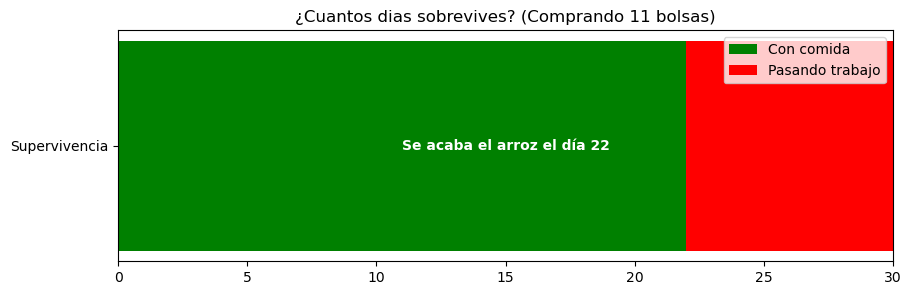

Resultado: Con 6449 CUP compras 11 bolsas y pasas 8 días sin comer.


In [7]:
# 1. Traer los datos necesarios
todas = icd.obtener_mipymes_por_municipio(datos, 'plaza') + icd.obtener_mipymes_por_municipio(datos, 'playa')
precios_arroz = icd.obtener_precios_de_producto(todas, 'Arroz')

# Datos
salario = datos['salario_referencia']['valor']
precio_arroz = min(precios_arroz)
gasto_diario = 0.5

# Sacando cuentas
bolsas = int(salario // precio_arroz)
dias_con_comida = bolsas / gasto_diario
dias_hambre = 30 - dias_con_comida

# Gráfico
plt.figure(figsize=(10, 3))

# Dibujamos dos barras, una al lado de la otra
etiquetas = ['Días con Arroz', 'Días de Hambre']
valores = [dias_con_comida, max(0, dias_hambre)]

plt.barh(['Supervivencia'], [dias_con_comida], color='green', label='Con comida')
plt.barh(['Supervivencia'], [max(0, dias_hambre)], left=[dias_con_comida], color='red', label='Pasando trabajo')

# Texto en el medio de la barra
plt.text(15, 0, f'Se acaba el arroz el día {int(dias_con_comida)}',
         ha='center', va='center', color='white', weight='bold')

plt.title(f'¿Cuantos dias sobrevives? (Comprando {bolsas} bolsas)')
plt.xlim(0, 30) # Un mes de 30 dias
plt.legend()
plt.show()

print(f"Resultado: Con {salario} CUP compras {bolsas} bolsas y pasas {int(dias_hambre)} días sin comer.")

El experimento demuestra que la "dieta" en Cuba es matemáticamente insostenible. Si el arroz más barato se consume el 100% del salario y aun asi nos pasamos 8 días sin comer, es evidente que el concepto de 'salario promedio' no está diseñado para la estructura de precios actual de las MIPYMES. Básicamente, si quieres comer arroz y además encender la luz de la casa, las cuentas no dan

Pero espera, quizás aún tengamos esperanza de sobrevivir. Ya vimos que el arroz nos deja en ayuno antes de terminar el mes. Pero, ¿qué pasa si cambiamos de estrategia? El espagueti es el otro gran pilar de la dieta rápida. Según mis datos, yo consumo 250 g diarios (medio paquete de 500 g). Vamos a calcular si con el salario promedio y buscando el espagueti más barato, logramos llegar al día 30.

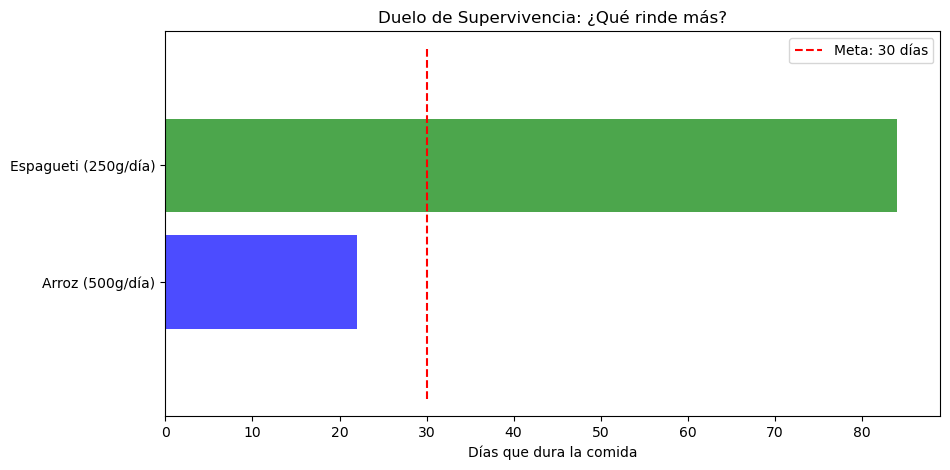

Con el arroz llegas al día 22.
Con la pasta llegas al día 84.


In [8]:
# Búsqueda de datos para ambos (Arroz y Espagueti)
todas = icd.obtener_mipymes_por_municipio(datos, 'plaza') + icd.obtener_mipymes_por_municipio(datos, 'playa')
sueldo = datos['salario_referencia']['valor']

# Datos del Arroz
precios_arroz = icd.obtener_precios_de_producto(todas, 'Arroz')
precio_min_arroz = min(precios_arroz)
bolsas_arroz = sueldo // precio_min_arroz
dias_arroz = bolsas_arroz / 0.5  # 500 g diarios

# Datos del espagueti
precios_spa = icd.obtener_precios_de_producto(todas, 'Espagueti')
precio_min_spa = min(precios_spa)
kilos_pasta = sueldo // precio_min_spa
dias_pasta = kilos_pasta / 0.25  # 250 g diarios

# Gráfico comparativo
plt.figure(figsize=(10, 5))

productos = ['Arroz (500g/día)', 'Espagueti (250g/día)']
duracion = [dias_arroz, dias_pasta]

plt.barh(productos, duracion, color=['blue', 'green'], alpha=0.7)

# Línea de meta de los 30 días
plt.plot([30, 30], [-1, 2], color='red', linestyle='--', label='Meta: 30 días')

plt.title('Duelo de Supervivencia: ¿Qué rinde más?')
plt.xlabel('Días que dura la comida')
plt.xlim(0, max(duracion) + 5)
plt.legend()
plt.show()

print(f"Con el arroz llegas al día {int(dias_arroz)}.")
print(f"Con la pasta llegas al día {int(dias_pasta)}.")

Los datos nos dan una sorpresa: mientras el arroz nos deja "colgados" a mitad de mes, el espagueti se revela como el verdadero aliado de la supervivencia. Comiendo solo pasta podríamos estirar el salario hasta los 84 días. Esto lo cambia todo, si nuestra meta inicial es solo sobrevivir 30 días, nos sobra presupuesto para dejar de comer solo espagueti y comprar salsa de tomate, sal o algún acompañamiento.

Al parecer todavía hay esperanza para el trabajador promedio... al menos hasta que recordamos que también hay que pagar la corriente, el gas y el agua. Pero hey, ¡al menos el hambre no nos sacará del juego antes de tiempo!

Por si tenías curiosidad de cuánto costaría comprar un solo ejemplar de cada producto de la canasta analizada frente al salario... bueno, aquí los datos nos muestran la realidad

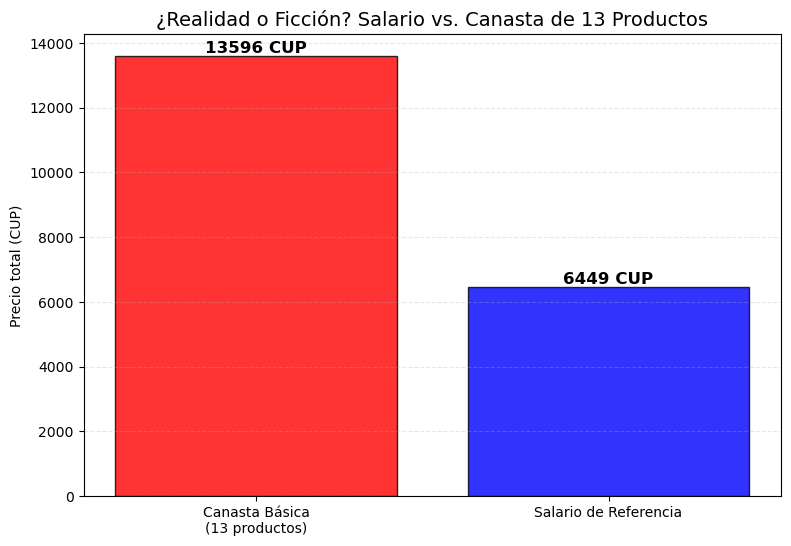

Costo total de la canasta: 13596 CUP
Porcentaje del salario consumido: 210.8%


In [9]:
#  Extraemos los nombres de los 13 productos directamente del json
nombres_canasta = [item['producto'] for item in datos['canasta_basica']]

# 2. Calculamos el costo promedio de todos los productos
precios_promedio = []
for p in nombres_canasta:
    precios = icd.obtener_precios_de_producto(todas, p)
    if precios:
        precios_promedio.append(np.mean(precios))
    else:
        # Si un producto no tiene precio, lo dejamos en 0 para no romper el código
        precios_promedio.append(0)

costo_total = sum(precios_promedio)
salario_h = datos['salario_referencia']['valor']

# Visualizacion
plt.figure(figsize=(9, 6))

etiquetas = ['Canasta Básica\n(13 productos)', 'Salario de Referencia']
valores = [costo_total, salario_h]

plt.bar(etiquetas, valores, color=['red', 'blue'], edgecolor='black', alpha=0.8)

# Añadimos los valores encima de las barras
for i in range(len(valores)):
    plt.text(i, valores[i] + 100, f'{int(valores[i])} CUP',
             ha='center', fontweight='bold', fontsize=12)

plt.title('¿Realidad o Ficción? Salario vs. Canasta de 13 Productos', fontsize=14)
plt.ylabel('Precio total (CUP)')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

# Dato final
porcentaje = (costo_total / salario_h) * 100
print(f"Costo total de la canasta: {int(costo_total)} CUP")
print(f"Porcentaje del salario consumido: {porcentaje:.1f}%")

# Conclusion:Lo que me enseñaron los datos

Después de pasar días procesando estos precios, la verdad es que me quedo con una mezcla de sorpresa y preocupación. Al principio esto era solo un trabajo de programación, pero ver ese gráfico de pastel devorándose el salario promedio solo con 7 productos me dio un golpe de realidad: el sueldo hoy en Cuba no es un ingreso, es un cronómetro que corre en contra de la comida. El mercado es un caos total, y esa brecha enorme de precios que encontramos en el arroz demuestra que si no sales a caminar y a 'luchar' el precio, te estás hundiendo tú mismo.

Mi pequeño experimento con el espagueti me dio algo de risa y alivio a la vez. Es curioso que la 'esperanza' de un trabajador sea vivir a base de pasta para llegar a los 30 días, pero ahí están los datos: o somos matemáticos para optimizar cada gramo que ingerimos, o las cuentas simplemente no dan. Al final, este trabajo me enseñó que en La Habana de 2026, sobrevivir es el algoritmo más complejo que nos toca resolver cada mes. Esperanza hay, pero raciónala bien, porque como incluya la cuenta de la luz, ni el espagueti nos salva.